<a href="https://colab.research.google.com/github/Hyunjin-Austin/Blood-Donation-Analysis/blob/main/Using_Machine_Learning_to_Analysis_of_Blood_Donation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Machine Learning to Analysis of Blood Donation

* Goal
  * Identify the trend of blood donation since 2005 (by center, by site)
  * Identify how different variables impact high blood donation.
  * Suggest how blood centers should perform to increase blood donation.
* Note: this data only contains data collected from the Korean National Red Cross. Other private blood center data was excluded.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Plan Stage

* Collect and load data
* Preprocess and feature engineering the dataset

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
xls = pd.ExcelFile('/content/drive/MyDrive/Blood donation analysis/FINAL/donation_data_by_center_Final.xlsx')
sheets = xls.sheet_names
sheets

['donation_by_center', 'eligible_population']

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Blood donation analysis/FINAL/donation_data_by_center_Final.xlsx', sheet_name = 'donation_by_center')
display(data.shape)
data.head()

(285, 17)

,year,blood_center,whole_blood,apheresis,total_fixed_donation,total_mobile_donation,mobile_highschool,mobile_university,mobile_military_camp,mobile_religious_org,mobile_other,under_20,20s,30s,40s,50s,over60s
0,2005,seoul_central,258515,85670,173374,170811,35188,9804,95391,6303,24125,84450,200324,41265,13929,3893,324
1,2005,seoul_nambu,153972,26893,95871,84994,13351,4546,50858,3123,13116,41514,103952,24056,8442,2658,243
2,2005,seoul_dongbu,159369,36170,85348,110191,21805,8975,67728,3397,8286,64525,101478,19083,7934,2299,220
3,2005,busan,156978,56246,126122,87102,21341,5502,33568,1500,25191,63337,109657,30528,7383,2152,167
4,2005,daegu,148853,45299,85958,108194,33076,12490,35494,1557,25577,68467,89573,24652,8798,2519,143


### Definition and Notes

<font color = 'blue'>


* Collected a total of 247 data with 17 variables.
* Definition of the data <br>
  * Blood Center: location of blood center.
    * For convenience, translated the English name of the blood center as the region of each center.
  * total_eligible_population: eligible population for blood donation (16-69).
  * total_donation: total number of blood donations made at the center for each year
  * whole_blood_donation, apheresis_donation : types of donation
  * mobile_donation: donations made at mobile-site (donation bus)
  * fixed_donation: donations made at fixed-site
  * Under 20s, 20s, 30s, 40, 50s, 60s : number of donations among age group
</font>


### Preprocess the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   285 non-null    int64 
 1   blood_center           285 non-null    object
 2   whole_blood            285 non-null    int64 
 3   apheresis              285 non-null    int64 
 4   total_fixed_donation   285 non-null    int64 
 5   total_mobile_donation  285 non-null    int64 
 6   mobile_highschool      285 non-null    int64 
 7   mobile_university      285 non-null    int64 
 8   mobile_military_camp   285 non-null    int64 
 9   mobile_religious_org   285 non-null    int64 
 10  mobile_other           285 non-null    int64 
 11  under_20               285 non-null    int64 
 12  20s                    285 non-null    int64 
 13  30s                    285 non-null    int64 
 14  40s                    285 non-null    int64 
 15  50s                    

<font color = 'blue'>

* Check duplicates and null data </font>

In [ ]:
display(f'Total duplicated data : {data.duplicated().sum()}')

'Total duplicated data : 0'

<font color = 'blue'>

* Identified the dataset has no null values nor duplicated data.
* Confirmed the data types are set appropriately.
* Merged columns that have low proportions </font>

In [ ]:
df = data.copy()

# Add new column 'total_donations'
df['total_donation'] = df['total_fixed_donation'] + df['total_mobile_donation']

# merge 50s and over 60s age group into over 50s
df['over_50s'] = df['50s'] + df['over60s']

# merge religious and others donations into others(religious)
df['mobile_others'] = df['mobile_religious_org'] + df['mobile_other']

# drop original columns
df.drop(columns=['mobile_other', 'mobile_religious_org', '50s', 'over60s'], axis = 1, inplace = True)

display(df.shape)
df.head()

(285, 16)

,year,blood_center,whole_blood,apheresis,total_fixed_donation,total_mobile_donation,mobile_highschool,mobile_university,mobile_military_camp,under_20,20s,30s,40s,total_donation,over_50s,mobile_others
0,2005,seoul_central,258515,85670,173374,170811,35188,9804,95391,84450,200324,41265,13929,344185,4217,30428
1,2005,seoul_nambu,153972,26893,95871,84994,13351,4546,50858,41514,103952,24056,8442,180865,2901,16239
2,2005,seoul_dongbu,159369,36170,85348,110191,21805,8975,67728,64525,101478,19083,7934,195539,2519,11683
3,2005,busan,156978,56246,126122,87102,21341,5502,33568,63337,109657,30528,7383,213224,2319,26691
4,2005,daegu,148853,45299,85958,108194,33076,12490,35494,68467,89573,24652,8798,194152,2662,27134


<font color = 'blue'>

To identify which factors contribute to high donations, we Set top 25% of total donation performance for each center as ‘high_donation’ (1 or 0)'. </font>

In [ ]:
# Add new column indicating top 25% of the total donation performance for each blood center
df['high_donations'] = 0

for i in df['blood_center'].unique():
  center_df = df[df['blood_center'] == i]
  threshold = center_df['total_donation'].quantile(0.75)
  df.loc[(df['blood_center'] == i) & (df['total_donation'] >= threshold), 'high_donations'] = 1

df.head()

,year,blood_center,whole_blood,apheresis,total_fixed_donation,total_mobile_donation,mobile_highschool,mobile_university,mobile_military_camp,under_20,20s,30s,40s,total_donation,over_50s,mobile_others,high_donations
0,2005,seoul_central,258515,85670,173374,170811,35188,9804,95391,84450,200324,41265,13929,344185,4217,30428,1
1,2005,seoul_nambu,153972,26893,95871,84994,13351,4546,50858,41514,103952,24056,8442,180865,2901,16239,0
2,2005,seoul_dongbu,159369,36170,85348,110191,21805,8975,67728,64525,101478,19083,7934,195539,2519,11683,0
3,2005,busan,156978,56246,126122,87102,21341,5502,33568,63337,109657,30528,7383,213224,2319,26691,0
4,2005,daegu,148853,45299,85958,108194,33076,12490,35494,68467,89573,24652,8798,194152,2662,27134,0


In [ ]:
# Check distribtuion of the class
df['high_donations'].value_counts(normalize = True)

high_donations
0    0.736842
1    0.263158
Name: proportion, dtype: float64

## 2. Analyze Stage


### <font color = 'red'> (Note) Visualization </font>

* <font color = 'red'> For more precise visualization, please visit following tableau page.

<font>

### Distribution of the data

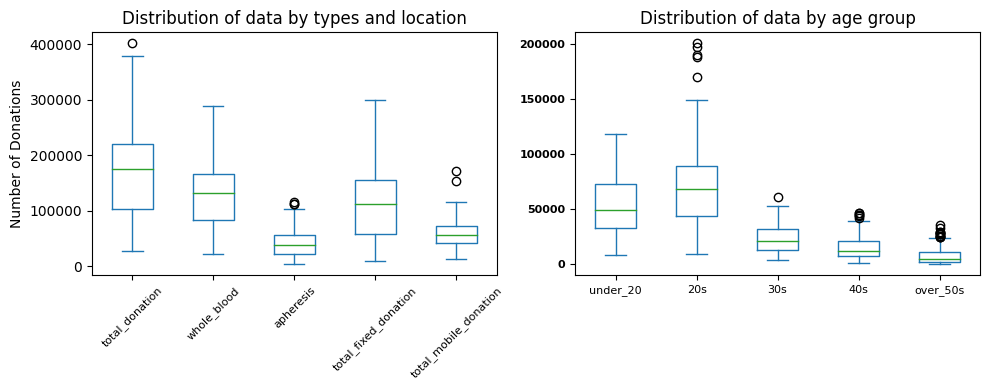

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

df[['total_donation', 'whole_blood', 'apheresis', 'total_fixed_donation', 'total_mobile_donation']].plot(kind = 'box', ax = axes[0])
axes[0].tick_params(axis='x', labelrotation=45, labelsize = 8)
axes[0].set_title('Distribution of data by types and location')
axes[0].set_ylabel('Number of Donations')

df[['under_20', '20s', '30s', '40s', 'over_50s']].plot(kind = 'box', ax = axes[1])
axes[1].set_title('Distribution of data by age group')

plt.tight_layout()
plt.xticks(rotation = 0, fontsize = '8')
plt.yticks(fontweight = 'bold', fontsize = '8')
plt.tight_layout()
plt.show()

<font color = 'blue'>

* Identified some outliers among different variables.kept these outliers considering the characteristic of tree-based models.
</font>

### Exploratory Data Analysis (EDA) - by year

* Analyze how the donations has been changed over the years

In [ ]:
# Group dataset by year to analyze yearly trend
df_by_year = df.groupby('year').agg(sum).reset_index()

# Drop blood center column
df_by_year.drop('blood_center', axis = 1, inplace = True)
df_by_year.head()

,year,whole_blood,apheresis,total_fixed_donation,total_mobile_donation,mobile_highschool,mobile_university,mobile_military_camp,under_20,20s,30s,40s,total_donation,over_50s,mobile_others,high_donations
0,2005,1679370,544266,1014170,1209466,293838,101838,559150,698597,1133547,273032,92702,2223636,25758,254640,1
1,2006,1646881,603722,1189664,1060939,321625,110366,429974,750951,1110223,257409,102352,2250603,29668,198974,1
2,2007,1710645,318039,1129282,899402,308519,80066,320063,718835,926597,254998,98254,2028684,30000,190754,1
3,2008,1811612,453980,1299746,965846,337228,87216,336504,827189,1003958,283857,113426,2265592,37162,204898,1
4,2009,1916640,545240,1537972,923908,284924,87735,319614,863443,1085793,322287,142577,2461880,47780,231635,2


* To get donation rate by year, merged eligible population data with 'df_by_year'

In [ ]:
# Import dataset (eligible population)
eligible_population = pd.read_excel('/content/drive/MyDrive/Blood donation analysis/Processed Data/donation_data_by_center_0719.xlsx', sheet_name = 'eligible_population')
eligible_population.head(3)

,total_eligible_population,under_20,20s,30s,40s,50s,over_60,year,region
0,7905186.0,509024.0,1827678.0,1943527.5,1733332.0,1167281.0,724343.5,2005,seoul
1,2830713.0,194847.5,618479.0,596355.0,661780.5,466288.0,292963.0,2005,busan
2,1920230.5,141245.5,402835.0,489460.0,485152.5,246796.0,154741.5,2005,incheon


In [ ]:
# Group by eligible population dataset by 'year'
eligible_population_by_year = eligible_population.groupby('year')[['total_eligible_population', 'under_20', '20s', '30s', '40s', '50s', 'over_60']].sum().reset_index().astype(int)
eligible_population_by_year.head(3)

,year,total_eligible_population,under_20,20s,30s,40s,50s,over_60
0,2005,36138387,2502286,7697454,8859245,8325045,5079573,3674783
1,2006,36375720,2497795,7556958,8789633,8417973,5411366,3701994
2,2007,36656388,2547720,7404698,8714447,8498413,5701710,3789398


In [ ]:
# merge two datasets to calculate 'donation rate'
df_by_year = pd.merge(df_by_year, eligible_population_by_year[['year', 'total_eligible_population']], on = 'year', how = 'left')
df_by_year.head(3)

,year,whole_blood,apheresis,total_fixed_donation,total_mobile_donation,mobile_highschool,mobile_university,mobile_military_camp,under_20,20s,30s,40s,total_donation,over_50s,mobile_others,high_donations,total_eligible_population
0,2005,1679370,544266,1014170,1209466,293838,101838,559150,698597,1133547,273032,92702,2223636,25758,254640,1,36138387
1,2006,1646881,603722,1189664,1060939,321625,110366,429974,750951,1110223,257409,102352,2250603,29668,198974,1,36375720
2,2007,1710645,318039,1129282,899402,308519,80066,320063,718835,926597,254998,98254,2028684,30000,190754,1,36656388


In [ ]:
# Add new column 'donation_rate = total_donation / total_eligible_population'
df_by_year['donation_rate'] = ((df_by_year['total_donation'] / df_by_year['total_eligible_population'])*100).round(3)

df_by_year.head()

,year,whole_blood,apheresis,total_fixed_donation,total_mobile_donation,mobile_highschool,mobile_university,mobile_military_camp,under_20,20s,30s,40s,total_donation,over_50s,mobile_others,high_donations,total_eligible_population,donation_rate
0,2005,1679370,544266,1014170,1209466,293838,101838,559150,698597,1133547,273032,92702,2223636,25758,254640,1,36138387,6.153
1,2006,1646881,603722,1189664,1060939,321625,110366,429974,750951,1110223,257409,102352,2250603,29668,198974,1,36375720,6.187
2,2007,1710645,318039,1129282,899402,308519,80066,320063,718835,926597,254998,98254,2028684,30000,190754,1,36656388,5.534
3,2008,1811612,453980,1299746,965846,337228,87216,336504,827189,1003958,283857,113426,2265592,37162,204898,1,36990676,6.125
4,2009,1916640,545240,1537972,923908,284924,87735,319614,863443,1085793,322287,142577,2461880,47780,231635,2,37311028,6.598


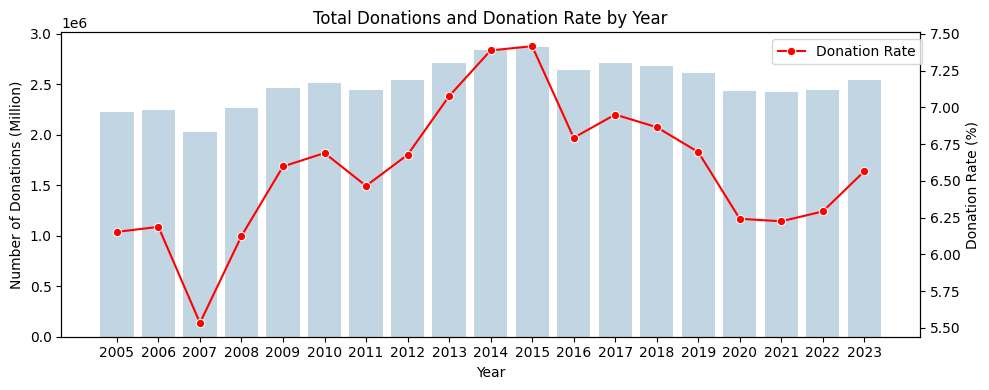

In [ ]:
fig, ax1 = plt.subplots(figsize = (10, 4))

ax1 = sns.barplot(data = df_by_year, x = 'year', y = 'total_donation', alpha = 0.3)
ax1.set_title('Total Donations and Donation Rate by Year')
ax1.set_ylabel('Number of Donations (Million)')
ax1.set_xlabel('Year')

ax2 = ax1.twinx()
ax2 = sns.lineplot(data = df_by_year['donation_rate'], color = 'red', marker = 'o', label = 'Donation Rate')
ax2.set_ylabel('Donation Rate (%)')

plt.legend(bbox_to_anchor=(1.01,1))
plt.tight_layout()
plt.show()

In [ ]:
df_by_year.loc[(df_by_year['total_donation'] == df_by_year['total_donation'].min()) |
                     (df_by_year['total_donation'] == df_by_year['total_donation'].max()) ,
                     ['year', 'total_donation', 'donation_rate']]

,year,total_donation,donation_rate
2,2007,2028684,5.534
10,2015,2872156,7.416


<font color = 'blue'>

* The lowest number of donations was in 2007 when only 2,028,684 donations were made (5.7% of the total eligible population), even lower than during the COVID-19 pandemic. Need further analysis of why the donations were lower than other years.
* The number of donations reached the highest in 2015 when 2,872,156 donations were made (7.4% of the total eligible population). Since then, the donation rate has shown a downward trend.
* The number of donations is in the stage of recovery after the COVID-19 pandemic.</font>

<font color = 'red'>

* Find the trend of age group by years. </font>

In [ ]:
# convert donation types, sites, and age groups as a ratio
def convert_to_ratio(df) :

  new_df = df.copy()

  new_df['whole_blood_prop'] = ((new_df['whole_blood'] / new_df['total_donation'])*100).round(3)
  new_df['apheresis_prop'] = ((new_df['apheresis'] / new_df['total_donation'])*100).round(3)

  new_df['fixed_donation_prop'] = ((new_df['total_fixed_donation'] / new_df['total_donation'])*100).round(3)

  new_df['mobile_donation_prop'] = ((new_df['total_mobile_donation'] / new_df['total_donation'])*100).round(3)
  new_df['mobile_highschool_prop'] = ((new_df['mobile_highschool'] / new_df['total_mobile_donation'])*100).round(3)
  new_df['mobile_university_prop'] = ((new_df['mobile_university'] / new_df['total_mobile_donation'])*100).round(3)
  new_df['mobile_military_camp_prop'] = ((new_df['mobile_military_camp'] / new_df['total_mobile_donation'])*100).round(3)
  new_df['mobile_other_prop'] = ((new_df['mobile_others'] / new_df['total_mobile_donation'])*100).round(3)

  new_df['under_20_prop'] = ((new_df['under_20'] / new_df['total_donation'])*100).round(3)
  new_df['20s_prop'] = ((new_df['20s'] / new_df['total_donation'])*100).round(3)
  new_df['30s_prop'] = ((new_df['30s'] / new_df['total_donation'])*100).round(3)
  new_df['40s_prop'] = ((new_df['40s'] / new_df['total_donation'])*100).round(3)
  new_df['over_50s_prop'] = ((new_df['over_50s'] / new_df['total_donation'])*100).round(3)

  # drop original columns
  new_df.drop(['whole_blood', 'apheresis', 'total_fixed_donation', 'total_mobile_donation', 'mobile_highschool', 'mobile_university',
                       'mobile_military_camp', 'mobile_others','under_20', '20s', '30s', '40s', 'over_50s'], axis = 1, inplace = True)

  return new_df

In [ ]:
df_by_year_ratio = convert_to_ratio(df_by_year)
df_by_year_ratio.head()

,year,total_donation,high_donations,total_eligible_population,donation_rate,whole_blood_prop,apheresis_prop,fixed_donation_prop,mobile_donation_prop,mobile_highschool_prop,mobile_university_prop,mobile_military_camp_prop,mobile_other_prop,under_20_prop,20s_prop,30s_prop,40s_prop,over_50s_prop
0,2005,2223636,1,36138387,6.153,75.524,24.476,45.609,54.391,24.295,8.420,46.231,21.054,31.417,50.977,12.279,4.169,1.158
1,2006,2250603,1,36375720,6.187,73.175,26.825,52.860,47.140,30.315,10.403,40.528,18.755,33.367,49.330,11.437,4.548,1.318
2,2007,2028684,1,36656388,5.534,84.323,15.677,55.666,44.334,34.303,8.902,35.586,21.209,35.434,45.675,12.570,4.843,1.479
3,2008,2265592,1,36990676,6.125,79.962,20.038,57.369,42.631,34.915,9.030,34.840,21.214,36.511,44.313,12.529,5.006,1.640
4,2009,2461880,2,37311028,6.598,77.853,22.147,62.471,37.529,30.839,9.496,34.594,25.071,35.073,44.104,13.091,5.791,1.941


In [ ]:
# Find a proportion of age groups among eligibile population
eligible_population_by_year_ratio = eligible_population_by_year.copy()

eligible_population_by_year_ratio['over_50s'] = eligible_population_by_year['50s'] + eligible_population_by_year['over_60']
eligible_population_by_year_ratio.drop(['50s', 'over_60'], axis = 1, inplace = True)

eligible_population_by_year_ratio['under_20_prop'] = ((eligible_population_by_year_ratio['under_20'] / eligible_population_by_year_ratio['total_eligible_population'])*100).round(3)
eligible_population_by_year_ratio['20s_prop'] = ((eligible_population_by_year_ratio['20s'] / eligible_population_by_year_ratio['total_eligible_population'])*100).round(3)
eligible_population_by_year_ratio['30s_prop'] = ((eligible_population_by_year_ratio['30s'] / eligible_population_by_year_ratio['total_eligible_population'])*100).round(3)
eligible_population_by_year_ratio['40s_prop'] = ((eligible_population_by_year_ratio['40s'] / eligible_population_by_year_ratio['total_eligible_population'])*100).round(3)
eligible_population_by_year_ratio['over_50s_prop'] = ((eligible_population_by_year_ratio['over_50s'] / eligible_population_by_year_ratio['total_eligible_population'])*100).round(3)

eligible_population_by_year_ratio.drop(['total_eligible_population', 'under_20', '20s', '30s', '40s', 'over_50s'], axis = 1, inplace = True)
eligible_population_by_year_ratio.set_index('year', inplace = True)
eligible_population_by_year_ratio.head(3)

,under_20_prop,20s_prop,30s_prop,40s_prop,over_50s_prop
year,,,,,
2005,6.924,21.300,24.515,23.037,24.225
2006,6.867,20.775,24.163,23.142,25.053
2007,6.950,20.200,23.773,23.184,25.892


* Plot the proportion changes in age groups

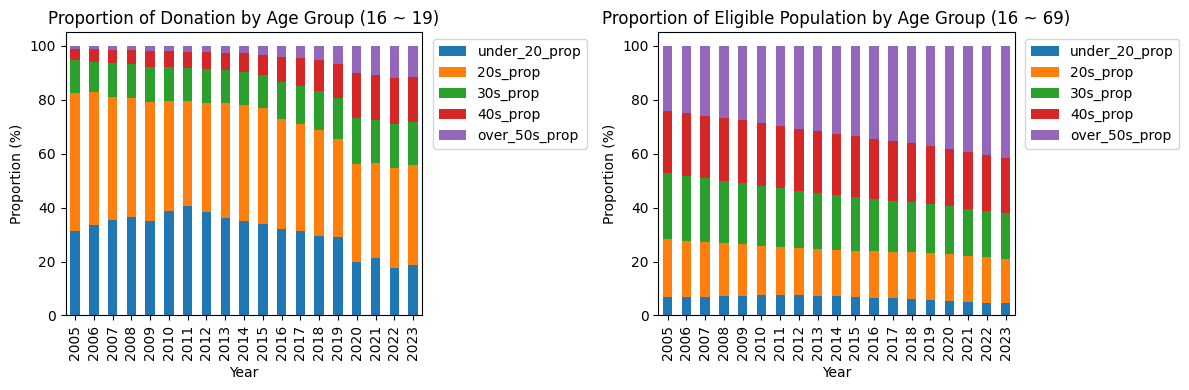

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (12,4))

df_by_year_ratio[['under_20_prop', '20s_prop', '30s_prop', '40s_prop', 'over_50s_prop', 'year']].plot(kind = 'bar', x = 'year', stacked = True, ax = axes[0])
axes[0].set_title('Proportion of Donation by Age Group (16 ~ 19)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Proportion (%)')
axes[0].legend(bbox_to_anchor=(1.01,1))

eligible_population_by_year_ratio.plot(kind = 'bar', stacked = True, ax = axes[1])
axes[1].set_title('Proportion of Eligible Population by Age Group (16 ~ 69)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Proportion (%)')
axes[1].legend(bbox_to_anchor=(1.01,1))

plt.tight_layout()
plt.show()

In [ ]:
df_by_year_ratio[['under_20_prop', '20s_prop', '30s_prop', '40s_prop', 'over_50s_prop']].mean()

under_20_prop    31.263947
20s_prop         41.347947
30s_prop         13.574895
40s_prop          9.189526
over_50s_prop     4.623684
dtype: float64

In [ ]:
eligible_population_by_year_ratio.mean()

under_20_prop     6.512895
20s_prop         18.053053
30s_prop         20.459895
40s_prop         22.334368
over_50s_prop    32.639526
dtype: float64

<font color = 'blue'>

* Identified imbalanced proportion between the 'eligible population' and 'donor population'
* Although the young population(under 20 and 20s) accounts for only about 25% of the total eligible population, they contribute over 70% of total donations.
* The 40s and 50s account for over 50% of the total eligible population, however, they contribute only 14% of total donations.
* It is notable that the eligible population over 50's proportion is increasing every year due to the aging society.
</font>

In [ ]:
# Make def to plot ratios

def plot_ratio(df, range) :
  fig, axes = plt.subplots(4, 1, figsize = (10, 8), sharex=True)

  df[['whole_blood_prop', 'apheresis_prop', 'year']].plot(kind = 'bar', x = 'year', stacked = True, ax = axes[0])
  axes[0].axhline(df['whole_blood_prop'].mean(), color = 'red', linestyle = '--', label = 'Average Whole Blood Proportion')
  axes[0].legend(bbox_to_anchor=(1.01,1))
  axes[0].set_title(f'Proportion of Donation Type by Year ({range})')
  axes[0].set_ylabel('Proportion (%)')

  df[['under_20_prop', '20s_prop', '30s_prop', '40s_prop', 'over_50s_prop', 'year']].plot(kind = 'bar', x = 'year', stacked = True, ax = axes[1])
  axes[1].legend(bbox_to_anchor=(1.01,1))
  axes[1].set_title(f'Proportion of Donor Age by Year ({range})')
  axes[1].set_ylabel('Proportion (%)')

  df[['fixed_donation_prop', 'mobile_donation_prop', 'year']].plot(kind = 'bar', x = 'year', stacked = True, color = ['green', 'red'], ax = axes[2])
  axes[2].legend(bbox_to_anchor=(1.01,1))
  axes[2].set_title(f'Proportion of Donation Site by Year ({range})')
  axes[2].set_ylabel('Proportion (%)')
  axes[2].axhline(y = df['fixed_donation_prop'].mean(), color = 'blue', linestyle ='--', label = 'Average Fixed-site Proportion')

  df[['mobile_highschool_prop', 'mobile_university_prop', 'mobile_military_camp_prop', 'mobile_other_prop', 'year']].plot(kind = 'bar', x = 'year', stacked = True, ax = axes[3])
  axes[3].legend(bbox_to_anchor=(1.01,1))
  axes[3].set_title(f'Proportion of Mobile-site Donation by Year ({range})')
  axes[3].set_ylabel('Proportion (%)')
  axes[3].set_xlabel('Year')

  plt.xticks(rotation = 0, fontsize = '8')
  plt.yticks(fontweight = 'bold', fontsize = '8')
  plt.tight_layout()
  plt.show()

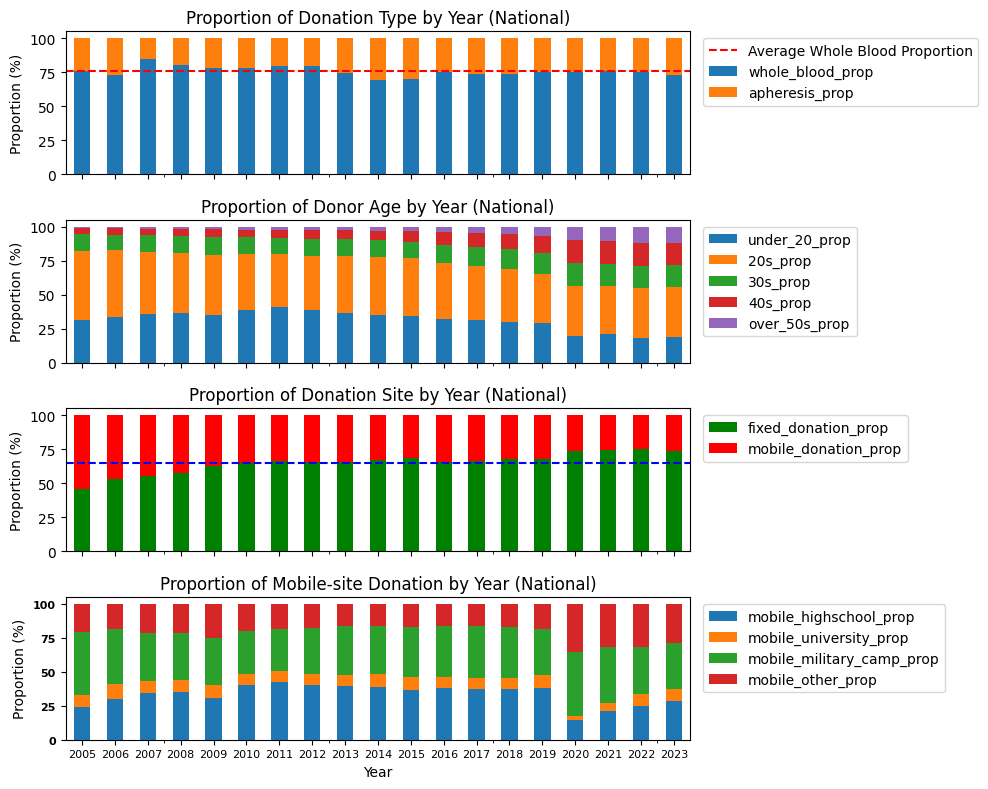

In [ ]:
plot_ratio(df_by_year_ratio, 'National')

In [ ]:
# check mean of whole blood proportion for each year
df_by_year_ratio['whole_blood_prop'].mean()

75.67642105263157

In [ ]:
df_by_year_ratio['fixed_donation_prop'].mean()

64.9967894736842

In [ ]:
# find a year with highest proportion of fixed-site donation
df_by_year_ratio.loc[(df_by_year_ratio['fixed_donation_prop'] == df_by_year_ratio['fixed_donation_prop'].max()) |
                     (df_by_year_ratio['fixed_donation_prop'] == df_by_year_ratio['fixed_donation_prop'].min()), ['year','fixed_donation_prop']]

,year,fixed_donation_prop
0,2005,45.609
17,2022,75.083


<font color = 'blue'>

* No significant change has been identified in the proportion of donation type (whole blood or apheresis).
* The proportion of age over 30 is gradually increasing, which may be due to an aging society. However, their contribution compared to their proportion in eligibility is still low.
* A gradual decrease in donations among those aged under 20 was observed, adding a steep decline since 2020 due to COVID-19. This can also be observed through the 'proportion of mobile-site donation' where the proportion of 'high-school' mobile donations has declined significantly in 2020.
* The proportion of fixed-site donations is gradually increasing, reaching 75% of total donations in 2022 from 45% in 2005.
 </font>

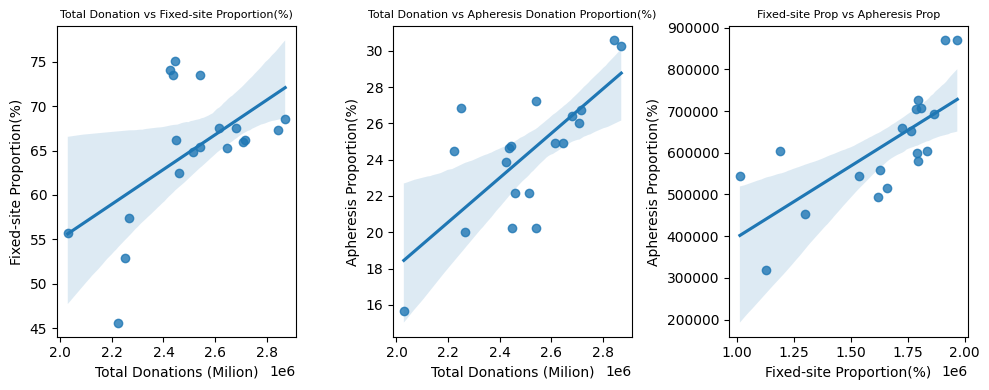

In [ ]:
# Visualize relationships between variables
fig, axes = plt.subplots(1, 3, figsize = (10, 4))

sns.regplot(data = df_by_year_ratio, x = 'total_donation', y = 'fixed_donation_prop', ax = axes[0])
sns.regplot(data = df_by_year_ratio, x = 'total_donation', y = 'apheresis_prop', ax = axes[1])
sns.regplot(data = df_by_year, x = 'total_fixed_donation', y = 'apheresis', ax = axes[2])

axes[0].set_title('Total Donation vs Fixed-site Proportion(%)', fontsize = 8)
axes[0].set_xlabel('Total Donations (Milion)')
axes[0].set_ylabel('Fixed-site Proportion(%)')

axes[1].set_title('Total Donation vs Apheresis Donation Proportion(%)', fontsize = 8)
axes[1].set_xlabel('Total Donations (Milion)')
axes[1].set_ylabel('Apheresis Proportion(%)')

axes[2].set_title('Fixed-site Prop vs Apheresis Prop', fontsize = 8)
axes[2].set_xlabel('Fixed-site Proportion(%)')
axes[2].set_ylabel('Apheresis Proportion(%)')

plt.tight_layout()
plt.show()

#### Insights
<font color = 'blue'><br>
* The proportion of whole blood donation has remained at an
average around 76% of total donations.
* The proportion of fixed-site donations has gradually increased every year and reached 75% of total donations in 2022. It may be due to the COVID-19 pandemic where many organizations were unable to hold events.
* The proportion of age over 30 is gradually increasing, which may be due to an aging society.
* The gradual decrease in donations among those aged under 20 and observed a steep decline since 2020 due to COVID-19. This can be also observed through the 'proportion of mobile-site donation' where the proportion of 'high-school' mobile donations has declined significantly in 2020.
* On the other hand, there was an increased proportion of age over 30, which reached over 40% of total donations in 2023 from 17% in 2005.
* Also steep decrease in the proportion of under 20s since 2020 may be justified due to the lockdown in schools during the COVID-19 pandemic.</font>

<font color = 'blue'>

* Identified additional relationships between variables as follows
 * Positive relationship between 'total donation' and proportion of 'fixed-site' donations. Need further analysis to determine significance.
 * Positive relationship between 'total donation' and proportion of 'apheresis' donations. Need further analysis to determine significance.
 * Positive relationship between 'fixed-site' donation and 'apheresis' donation. This may be because most apheresis donation is done at the 'fixed-site'.
</font>

### Analyze trend - by region
  * Analyze how each regions account for total donations.

In [ ]:
# Calculate total donation by year
total_donations_by_year = df_by_year[['year', 'total_donation']]
total_donations_by_year.head(3)

,year,total_donation
0,2005,2223636
1,2006,2250603
2,2007,2028684


<font color = 'blue'>

* Calculate the proportion of the blood center's blood donation for each year.
* And to calculate the donation rate of each region, merged three seoul blood centers.</font>

In [ ]:
# merge seoul located centers('centeral', 'nambu', and 'dongbu') to calculate the donation rate of each region
df_seoul_merged = df.loc[df['blood_center'].isin(['seoul_central', 'seoul_nambu', 'seoul_dongbu'])]
df_seoul_merged = df_seoul_merged.groupby('year').agg(sum).reset_index().round(3)
df_seoul_merged['blood_center'] = 'seoul'

# concat with df_without_seoul
df_without_seoul = df.loc[~df['blood_center'].isin(['seoul_central', 'seoul_nambu', 'seoul_dongbu'])]
df_seoul_merged = pd.concat([df_without_seoul, df_seoul_merged], axis = 0)
df_seoul_merged = df_seoul_merged.sort_values(by = ['year', 'total_donation'], ascending = [True, False]).reset_index(drop = True)
df_seoul_merged.head()

,year,blood_center,whole_blood,apheresis,total_fixed_donation,total_mobile_donation,mobile_highschool,mobile_university,mobile_military_camp,under_20,20s,30s,40s,total_donation,over_50s,mobile_others,high_donations
0,2005,seoul,571856,148733,354593,365996,70344,23325,213977,190489,405754,84404,30305,720589,9637,58350,1
1,2005,busan,156978,56246,126122,87102,21341,5502,33568,63337,109657,30528,7383,213224,2319,26691,0
2,2005,daegu,148853,45299,85958,108194,33076,12490,35494,68467,89573,24652,8798,194152,2662,27134,0
3,2005,gwangju,114630,59720,75930,98420,32353,10022,26205,61185,79459,24366,7622,174350,1718,29840,0
4,2005,daejeon,119144,42168,46106,115206,20940,9167,70648,61606,80329,12144,5469,161312,1764,14451,0


In [ ]:
df_seoul_merged['year'] = pd.to_numeric(df_seoul_merged['year'], errors='coerce')
eligible_population['year'] = pd.to_numeric(eligible_population['year'], errors='coerce')

# merge df_seoul_merged dataframe with eligible population
df_seoul_merged = pd.merge(df_seoul_merged, eligible_population[['year', 'region', 'total_eligible_population']],
                           left_on = ['year','blood_center'],
                           right_on = ['year', 'region'],
                           how = 'left')
df_seoul_merged = df_seoul_merged.drop('region', axis = 1)

# merge 'df_seoul_merged' dataframe with 'total donations by year'
df2 = pd.merge (df_seoul_merged, total_donations_by_year, on = 'year', how = 'left')
df2.rename(columns = {'total_donation_x' : 'total_donation', 'total_donation_y' : 'national_total_donation'}, inplace = True)

# Calculate proportion blood center for each year
df2['total_donation_prop'] = ((df2['total_donation'] / df2['national_total_donation'])*100).round(3)

# Calculate donation rate based on total eligible population
df2['donation_rate'] = ((df2['total_donation'] / df2['total_eligible_population'])*100).round(3)

In [ ]:
# Group by center with mean of each variables
df2_by_center = df2.groupby('blood_center').agg('mean').round(0)
df2_by_center.drop(['year', 'national_total_donation', 'high_donations'], axis = 1, inplace = True)

df2_by_center_ratio = convert_to_ratio(df2_by_center).sort_values(by = 'total_donation_prop', ascending = False).round(0).reset_index()
df2_by_center_ratio.rename(columns = {'blood_center' : 'region'}, inplace = True)

In [ ]:
df2_by_center_ratio.head(3)

,region,total_donation,total_eligible_population,total_donation_prop,donation_rate,whole_blood_prop,apheresis_prop,fixed_donation_prop,mobile_donation_prop,mobile_highschool_prop,mobile_university_prop,mobile_military_camp_prop,mobile_other_prop,under_20_prop,20s_prop,30s_prop,40s_prop,over_50s_prop
0,seoul,756451.0,7750420.0,30.0,10.0,74.0,26.0,72.0,28.0,28.0,5.0,47.0,19.0,27.0,44.0,15.0,9.0,5.0
1,busan,214509.0,2689273.0,9.0,8.0,75.0,25.0,72.0,28.0,34.0,9.0,33.0,24.0,32.0,42.0,13.0,8.0,4.0
2,daegu,220917.0,3821338.0,9.0,6.0,78.0,22.0,64.0,36.0,38.0,15.0,27.0,20.0,33.0,42.0,12.0,9.0,4.0


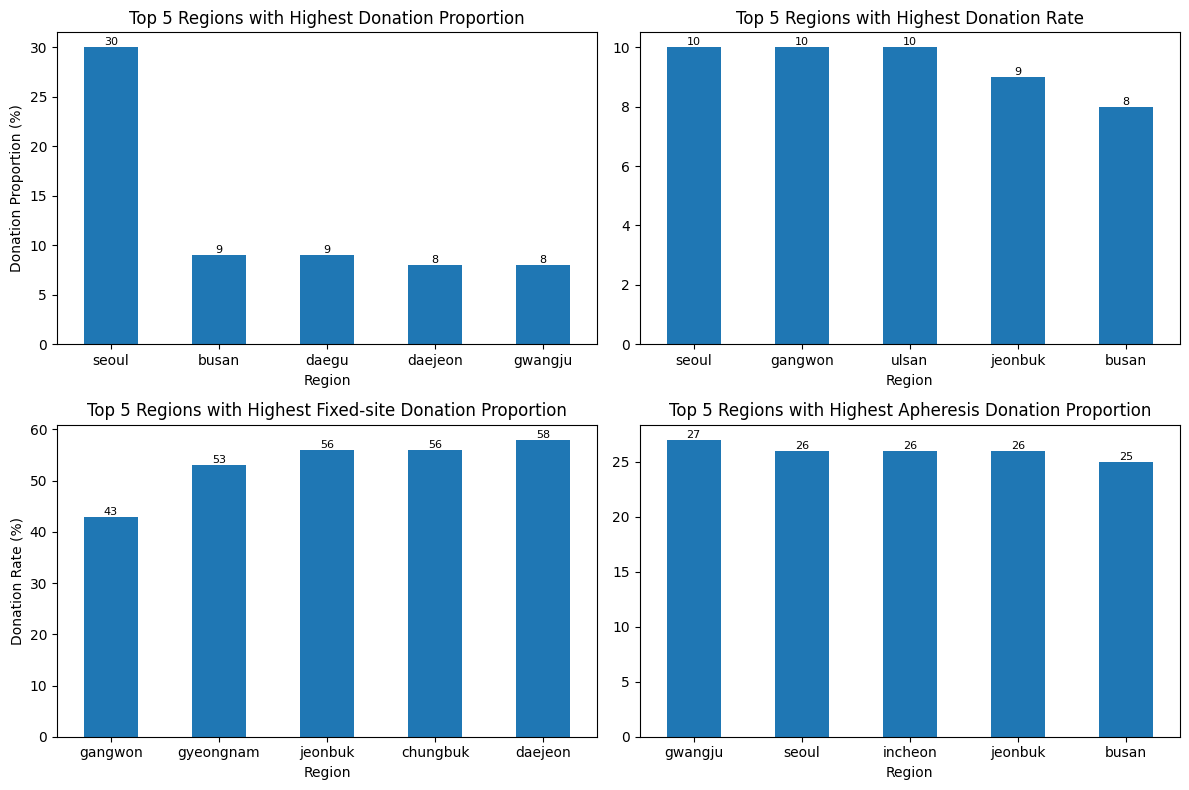

In [ ]:
fig, axes = plt.subplots(2,2,figsize = (12, 8))

df2_by_center_ratio[['region', 'total_donation_prop']][:5].plot(kind = 'bar', x = 'region', y = 'total_donation_prop', legend = False, ax = axes[0,0])
axes[0,0].bar_label(axes[0,0].containers[0], fontsize = 8)
axes[0,0].set_title('Top 5 Regions with Highest Donation Proportion')
axes[0,0].set_xlabel('Region')
axes[0,0].set_ylabel('Donation Proportion (%)')

df2_by_center_ratio[['region', 'donation_rate']].sort_values(by='donation_rate', ascending = False)[:5].plot(kind = 'bar', x = 'region', y = 'donation_rate', legend = False, ax = axes[0,1])
axes[0,1].bar_label(axes[0,1].containers[0], fontsize = 8)
axes[0,1].set_title('Top 5 Regions with Highest Donation Rate')
axes[0,1].set_xlabel('Region')

df2_by_center_ratio[['region', 'fixed_donation_prop']].sort_values(by='fixed_donation_prop', ascending = True)[:5].plot(kind = 'bar', x = 'region', y = 'fixed_donation_prop', legend = False, ax = axes[1,0])
axes[1,0].bar_label(axes[1,0].containers[0], fontsize = 8)
axes[1,0].set_title('Top 5 Regions with Highest Fixed-site Donation Proportion')
axes[1,0].set_xlabel('Region')
axes[1,0].set_ylabel('Donation Rate (%)')

df2_by_center_ratio[['region', 'apheresis_prop']].sort_values(by='apheresis_prop', ascending = False)[:5].plot(kind = 'bar', x = 'region', y = 'apheresis_prop', legend = False, ax = axes[1,1])
axes[1,1].bar_label(axes[1,1].containers[0], fontsize = 8)
axes[1,1].set_title('Top 5 Regions with Highest Apheresis Donation Proportion')
axes[1,1].set_xlabel('Region')

for ax in axes.flat:
    ax.tick_params(axis='x', labelrotation=0)

plt.tight_layout()
plt.show()

#### Insights

<font color = 'blue'>

* Identified top 5 blood centers account for over 65% of total donations.
* <font color = 'red'>'Seoul', 'Gang-won', and 'Ulsan' </font> areas had the highest donation rate among the eligible population (10% of eligible populations donated). <font color = 'red'>'Gyeonggi'</font> had the lowest donation rate among the eligible population (2% of eligible populations donated).
* <font color = 'red'>'Seoul', 'Busan', and 'Incheon'</font> blood centers had a relatively high proportion of fixed-site donations, 72% of total donations.
* Found only <font color = 'red'>'Gang-won' </font> blood center has the lowest proportion of fixed-site donations (43% of total donations).
* <font color = 'red'>'Gyeong-nam'</font> blood center has the highest whole blood donation proportion 83% of total donations, followed by <font color = 'red'>'Gyeong-gi'</font> blood center (80% of total donations).<font color = 'red'> 'Gwangju'</font> blood center has the highest apheresis donation proportion with 27% of total donations.
* It is notable that some blood centers are highly dependent on specific mobile sites for mobile donations. For example,
 * <font color = 'red'>'Incheon' </font> blood center is highly dependent on high school mobile donations (49% of total mobile-site donations), followed by 'Ulsan' blood center with 47% of total mobile-site donations.
 * <font color = 'red'>'Gang-won' </font> blood center is highly dependent on military camp mobile donation (Over 70% of total mobile-site donations). <font color = 'red'>
 * 'Seoul'</font> blood centers are also quite dependent on military camps, accounts 47% of total mobile donations.</font>
<font color = 'blue'>
* Observed most blood centers are highly dependent on young age groups (under 20 and 20s) with over 70% of total donations.
 * Only 4 blood centers <font color = 'red'> ('Gyeong-gi', 'Incheon', 'Ulsan', and 'Je-ju') </font> had over 30% of donations from ages over 30. </font>

## 3. Construct Stage

<font color = 'blue'>

* (Review Plan Stage)The goal of this study is to identify the importance of each variable to donation.
* We will build classification models and select the best model with the highest f1 score.
* Since the numbers between variables are different and the number of donations between blood centers has a high variance, we will convert the data into a ratio.
* To avoid multicollinearity, we have dropped the 'apheresis' donation ratio and specified the location of donation(fixed, high school, university, military camp, religious, and others). This will help to identify the contribution of each location.
* We have kept ratios by age group to identify the contribution of each age group.
* Dependent variable (Y): high_donations (1 or 0)
* Independent variables (X):
 * Whole blood donation ratio
 * Ratio by locations(5 variables): fixed, high_school, university, military_camp, others(religious)
 * Ratio by age groups(5 variables): under 20, 20s, 30s, 40s, over 50s
* We have also initiated the following test to compare the effectiveness of different methods of training
  * Test the effectiveness of 'SMOTE (Synthetic Minority Over-sampling Technique)' in handling imbalanced classes in classification tasks (using the Decision Tree model).
  * Test differences between 'Grid Search Cross-Validation' or 'Randomized Search Cross-Validation' methods to find the best parameters (using the Random Forest model).

</font>

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, GroupKFold, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from scipy.stats import randint
from scipy.stats import uniform

import pickle

#### Split data for modeling

In [ ]:
df.head()

,year,blood_center,whole_blood,apheresis,total_fixed_donation,total_mobile_donation,mobile_highschool,mobile_university,mobile_military_camp,under_20,20s,30s,40s,total_donation,over_50s,mobile_others,high_donations
0,2005,seoul_central,258515,85670,173374,170811,35188,9804,95391,84450,200324,41265,13929,344185,4217,30428,1
1,2005,seoul_nambu,153972,26893,95871,84994,13351,4546,50858,41514,103952,24056,8442,180865,2901,16239,0
2,2005,seoul_dongbu,159369,36170,85348,110191,21805,8975,67728,64525,101478,19083,7934,195539,2519,11683,0
3,2005,busan,156978,56246,126122,87102,21341,5502,33568,63337,109657,30528,7383,213224,2319,26691,0
4,2005,daegu,148853,45299,85958,108194,33076,12490,35494,68467,89573,24652,8798,194152,2662,27134,0


In [ ]:
# add donation rate column
df_modeling = df.copy()

# filter the variables
df_modeling = df_modeling[['blood_center', 'total_donation', 'whole_blood', 'total_fixed_donation', 'mobile_highschool', 'mobile_university', 'mobile_military_camp',
                           'mobile_others', 'under_20', '20s', '30s', '40s', 'over_50s','high_donations']]
display(df_modeling.shape)
df_modeling.head()

(285, 14)

,blood_center,total_donation,whole_blood,total_fixed_donation,mobile_highschool,mobile_university,mobile_military_camp,mobile_others,under_20,20s,30s,40s,over_50s,high_donations
0,seoul_central,344185,258515,173374,35188,9804,95391,30428,84450,200324,41265,13929,4217,1
1,seoul_nambu,180865,153972,95871,13351,4546,50858,16239,41514,103952,24056,8442,2901,0
2,seoul_dongbu,195539,159369,85348,21805,8975,67728,11683,64525,101478,19083,7934,2519,0
3,busan,213224,156978,126122,21341,5502,33568,26691,63337,109657,30528,7383,2319,0
4,daegu,194152,148853,85958,33076,12490,35494,27134,68467,89573,24652,8798,2662,0


In [ ]:
# convert into ratio
columns_to_convert = ['whole_blood', 'total_fixed_donation', 'mobile_highschool', 'mobile_university',
                      'mobile_military_camp', 'mobile_others', 'under_20', '20s', '30s', '40s', 'over_50s']

for column in columns_to_convert:
  df_modeling[f'{column}_prop'] = (df_modeling[column] / df_modeling['total_donation'])*100
  df_modeling.drop(column, axis = 1, inplace = True)

df_modeling.head()

,blood_center,total_donation,high_donations,whole_blood_prop,total_fixed_donation_prop,mobile_highschool_prop,mobile_university_prop,mobile_military_camp_prop,mobile_others_prop,under_20_prop,20s_prop,30s_prop,40s_prop,over_50s_prop
0,seoul_central,344185,1,75.109316,50.372329,10.223572,2.848468,27.715037,8.840594,24.536223,58.202420,11.989192,4.046951,1.225213
1,seoul_nambu,180865,0,85.130899,53.006939,7.381749,2.513477,28.119316,8.978520,22.953031,57.474912,13.300528,4.667570,1.603959
2,seoul_dongbu,195539,0,81.502411,43.647559,11.151228,4.589877,34.636569,5.974767,32.998532,51.896553,9.759178,4.057503,1.288234
3,busan,213224,0,73.621168,59.150002,10.008723,2.580385,15.743068,12.517822,29.704442,51.428076,14.317338,3.462556,1.087589
4,daegu,194152,0,76.668281,44.273559,17.036137,6.433104,18.281553,13.975648,35.264638,46.135502,12.697268,4.531501,1.371091


In [ ]:
# Split X, y variable
X = df_modeling.drop(columns = ['blood_center', 'total_donation', 'high_donations'], axis = 1)
y = df_modeling['high_donations']

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape)
display(X_train.head())
print(y_train.shape)
display(y_train.value_counts(normalize = True))

(228, 11)


,whole_blood_prop,total_fixed_donation_prop,mobile_highschool_prop,mobile_university_prop,mobile_military_camp_prop,mobile_others_prop,under_20_prop,20s_prop,30s_prop,40s_prop,over_50s_prop
218,77.367421,44.931188,9.273726,2.049399,39.832428,3.913259,22.877362,51.298126,11.215057,9.791935,4.817520
166,70.947064,72.061336,7.088895,0.651129,15.108918,5.089723,21.467439,47.383598,16.619413,10.306678,4.222872
265,73.485807,70.992933,8.153283,4.163083,7.356339,9.334362,21.643138,36.514362,14.810504,16.595406,10.436590
194,75.169294,58.774204,18.262618,4.036610,5.681938,13.244630,34.446090,29.499524,18.043064,12.675907,5.335414
189,77.082723,57.895947,16.681653,3.465978,14.007152,7.949270,34.912802,40.901677,11.894107,8.375852,3.915562


(228,)


high_donations
0    0.736842
1    0.263158
Name: proportion, dtype: float64

In [ ]:
# scale the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })

    return table

In [ ]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

### Modeling Approach A : Logistic Regression Model

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
log_reg = GridSearchCV(LogisticRegression(random_state=42, solver='liblinear', max_iter=500, penalty='l1'),
                       param_grid, cv=5, scoring = 'f1')

# Fit the model
log_reg.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500, penalty='l1',
                                          random_state=42, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]}, scoring='f1')

In [ ]:
# Get the best model
log_reg_best_model = log_reg.best_estimator_

# Make predictions
predict_ytrain = log_reg_best_model.predict(X_train_scaled)

In [ ]:
log_reg_score = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])


accuracy = accuracy_score(y_train, predict_ytrain)
precision = precision_score(y_train, predict_ytrain)
recall = recall_score(y_train, predict_ytrain)
f1 = f1_score(y_train, predict_ytrain)

new_row = {'Model' : 'Logistic Regression', 'Accuracy' : accuracy, 'Precision' : precision, 'Recall' : recall, 'F1' : f1}

log_reg_score = pd.concat([log_reg_score, pd.DataFrame([new_row])], ignore_index=True)

log_reg_score

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.75,0.571429,0.2,0.296296


<font color = 'blue'>

* Identified logistic regression unable to capture high performance (over average) data appropriately (accuracy score 56%).
* This may be due to the complexity of the data where the logistic regression model assumes the linearlity of the data.
* The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower. </font>

### Modeling Approach B : Tree-based Model

* Note : didn't use scaled data for tree-based model.

#### Decision Tree Model - Using normal training set

In [ ]:
dt_model1 = DecisionTreeClassifier(random_state = 40)

# Define parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

scoring_param = {'precision','recall','accuracy','f1', 'roc_auc'}

# Initialize GridSearchCV
dt_non_smote = GridSearchCV(estimator=dt_model1, param_grid=param_grid,
                           scoring=scoring_param, cv=5, refit = 'f1', n_jobs=-1)

In [ ]:
# Fit the model
%%time
dt_non_smote.fit(X_train, y_train)

CPU times: user 298 ms, sys: 100 ms, total: 398 ms
Wall time: 5.26 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             refit='f1',
             scoring={'recall', 'roc_auc', 'precision', 'accuracy', 'f1'})

In [ ]:
dt_non_smote_score = make_results('Decision Tree (non-SMOTE) CV Result ', dt_non_smote, 'f1')

dt_non_smote_score

,model,precision,recall,F1,accuracy
0,Decision Tree (non-SMOTE) CV Result,0.448939,0.416667,0.424922,0.71942


#### Decision Tree Model - Using SMOTE training set

In [ ]:
dt_model2 = DecisionTreeClassifier(random_state = 42)

# Define parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

scoring_param = {'precision','recall','accuracy','f1', 'roc_auc'}

# Initialize GridSearchCV
dt_smote = GridSearchCV(estimator=dt_model2, param_grid=param_grid,
                           scoring=scoring_param, cv=5, refit = 'f1', n_jobs=-1)

In [ ]:
# Fit the model
%%time
dt_smote.fit(X_train_smote, y_train_smote)

CPU times: user 246 ms, sys: 20.6 ms, total: 266 ms
Wall time: 4.5 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             refit='f1',
             scoring={'recall', 'roc_auc', 'precision', 'accuracy', 'f1'})

In [ ]:
dt_smote_score = make_results('Decision Tree (SMOTE) CV Result ', dt_smote, 'f1')

dt_smote_score

,model,precision,recall,F1,accuracy
0,Decision Tree (SMOTE) CV Result,0.784428,0.86934,0.822185,0.812599


#### Random Forest Model - Grid Search CV

* Use Grid Search to find optimal hyperparameter.

In [ ]:
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# Define the model
rfr_1 = RandomForestClassifier(random_state = 42)

# Define parameter grid
param_grid = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# Define scoring parameters
scoring_param = {'precision', 'recall', 'accuracy', 'f1', 'roc_auc'}

# Set up GridSearchCV
rfr_grid_cv = GridSearchCV(estimator = rfr_1, param_grid=param_grid, cv=kf,
                            scoring=scoring_param, refit='f1', n_jobs=-1)

In [ ]:
# fit the model
%%time
rfr_grid_cv.fit(X_train_smote, y_train_smote)

CPU times: user 9.31 s, sys: 1.28 s, total: 10.6 s
Wall time: 9min 37s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='f1',
             scoring={'recall', 'roc_auc', 'precision', 'accuracy', 'f1'})

In [ ]:
# Check best params and score
print(f'Best Parameters: {rfr_grid_cv.best_params_}')
print(f'Best Score: {rfr_grid_cv.best_score_}')

Best Parameters: {'max_depth': None, 'max_features': 1.0, 'max_samples': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Best Score: 0.8534680779693566


In [ ]:
rfr_grid_cv_result = make_results('Random Forest (Grid Search) CV Result', rfr_grid_cv, 'f1')
rfr_grid_cv_result

,model,precision,recall,F1,accuracy
0,Random Forest (Grid Search) CV Result,0.830002,0.881283,0.853468,0.848288


#### Random Forest Model - Randomized Search CV

* Use Randomized Search CV to find optimal hyperparameter (get best accuracy score)

In [ ]:
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)

# Define the model
rfr_2 = RandomForestClassifier(random_state = 40)

# Define parameter distribution
param_dist = {
    'n_estimators': np.arange(50, 151, step=25),
    'max_depth': np.arange(5, 21),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
# Define scoring parameters
scoring_param = {'precision', 'recall', 'accuracy', 'f1', 'roc_auc'}

# Set up Randomized Search CV
rfr_random_cv = RandomizedSearchCV(estimator = rfr_2, param_distributions = param_dist, cv = kf, n_iter=100,
                                  scoring = scoring_param, refit = 'f1', random_state = 40, n_jobs = -1)

In [ ]:
# fit the model
%%time
rfr_random_cv.fit(X_train_smote, y_train_smote)

CPU times: user 2.85 s, sys: 281 ms, total: 3.13 s
Wall time: 1min 48s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=40, shuffle=True),
                   estimator=RandomForestClassifier(random_state=40),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50,  75, 100, 125, 150])},
                   random_state=40, refit='f1',
                   scoring={'recall', 'roc_auc', 'precision', 'accuracy', 'f1'})

In [ ]:
# Retrieve best CV score
print(f'Best CV Score: {rfr_random_cv.best_score_}')
print(f'Best Params: {rfr_random_cv.best_params_}')

Best CV Score: 0.8903939128471252
Best Params: {'n_estimators': 125, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 19, 'bootstrap': True}


In [ ]:
rfr_random_cv_result = make_results('Random Forest (Random Search) CV Result', rfr_random_cv, 'f1')
rfr_random_cv_result

,model,precision,recall,F1,accuracy
0,Random Forest (Random Search) CV Result,0.863884,0.921925,0.890394,0.886918


### Modeling Approach C : XGBoost

In [ ]:
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)

# Define the model
xgb = XGBClassifier(objective='binary:logistic', random_state=42, eval_metric='logloss')

# Define parameter distribution
param_dist = {
    'max_depth': np.arange(4, 9),
    'min_child_weight': np.arange(1, 6),
    'learning_rate': np.linspace(0.01, 0.3, num=30),
    'n_estimators': np.arange(50, 126, step=25),
    'subsample': np.linspace(0.6, 1.0, num=5),
    'colsample_bytree': np.linspace(0.6, 1.0, num=5)
}

# Define scoring parameters
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Set up Randomized Search
xgb_cv = RandomizedSearchCV(estimator = xgb, param_distributions =  param_dist, n_iter = 200,
                            random_state=42, scoring=scoring, cv = kf, refit='f1', n_jobs=-1)

In [ ]:
%%time
xgb_cv.fit(X_train_smote, y_train_smote)

CPU times: user 3.54 s, sys: 188 ms, total: 3.73 s
Wall time: 1min 16s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=40, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           imp...
                                        'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ]),
                                        'max_depth': array([4, 5, 6, 7, 8]),
                                        'min_child_weight': array([1, 2, 3, 4, 5]),
                                        'n_estimators': array([ 50,  75, 100, 125]),
                                        'subsample': array([0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42, refit='f1',
                   scoring={'accuracy', 'precision', 'recall', 'f1'})

In [ ]:
# Retrieve best CV score
print(f'Best CV Score: {xgb_cv.best_score_}')
print(f'Best Params: {xgb_cv.best_params_}')

Best CV Score: 0.8997255918287344
Best Params: {'subsample': 1.0, 'n_estimators': 75, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.24999999999999997, 'colsample_bytree': 1.0}


In [ ]:
xgb_cv_result = make_results('XGBoost CV Result', xgb_cv, 'f1')
xgb_cv_result

,model,precision,recall,F1,accuracy
0,XGBoost CV Result,0.854609,0.952406,0.899726,0.892845


In [ ]:
# Aggregate all training result
training_result = pd.concat([dt_non_smote_score, dt_smote_score, rfr_grid_cv_result, rfr_random_cv_result, xgb_cv_result])
training_result.sort_values(by = 'F1', ascending = False)

,model,precision,recall,F1,accuracy
0,XGBoost CV Result,0.854609,0.952406,0.899726,0.892845
0,Random Forest (Random Search) CV Result,0.863884,0.921925,0.890394,0.886918
0,Random Forest (Grid Search) CV Result,0.830002,0.881283,0.853468,0.848288
0,Decision Tree (SMOTE) CV Result,0.784428,0.869340,0.822185,0.812599
0,Decision Tree (non-SMOTE) CV Result,0.448939,0.416667,0.424922,0.719420


<font color = 'blue'>

* In training, the XGBoost classifier showed the best cross-validation f1 score with less time
* We have tested XGBoost and Random Forest (with Randomized Search) models as below.
</font>

In [ ]:
# Test models with the test data
rf_random_test_result = get_scores('Random Forest (Random Search_SMOTE) Test Score', rfr_random_cv, X_test, y_test)
xgb_test_result = get_scores('XGBoost (Random Search_SMOTE) Test Score', xgb_cv, X_test, y_test)

In [ ]:
test_results = pd.concat([rf_random_test_result, xgb_test_result])
test_results.sort_values(by = 'f1', ascending = False)

,model,precision,recall,f1,accuracy,AUC
0,XGBoost (Random Search_SMOTE) Test Score,0.555556,0.666667,0.606061,0.771930,0.738095
0,Random Forest (Random Search_SMOTE) Test Score,0.500000,0.466667,0.482759,0.736842,0.650000


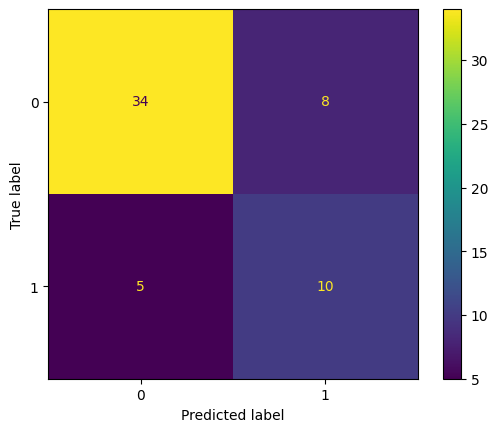

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, xgb_cv.best_estimator_.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = xgb_cv.classes_)

disp.plot(values_format = '')

## Execute Stage

#### Summary of model results

<font color = 'blue'>

* Used three types of model to find the impact of each variable; 'logistic', 'tree-based', and XGBoost.
* Since the output variable is imbalanced(75:25), the accuracy score will not be as confident as the precision and recall score. Hence we used the 'f1' score as the primary evaluation score.
* **Best optimal model**: 'XGBoost Classifier' model using Randomized Search Cross-validation showed the best score in both training and test data (with the highest f1, recall, and AUC). In fact, the 'XGBoost' algorithm is known to be a state-of-art model in classification tasks.
* **'F1-score'** is an aggregation of precision and recall score, that captures the minor class('high donations' in this data).
* **The Logistic Regression** model was unable to explain the data appropriately. The result shows that the logistic regression The Model fairly captures the data that are not high donation (85%) but poorly captures high donation data (25%). This may be due to the Complexity of the data where the linear regression model assumes the linearity of the data.
* We have also tested the effectiveness of the **'SMOTE'** method, which handles class imbalance in classification tasks. We have trained two decision tree models using a normal training set and a SMOTE-applied training set. The result shows that the SMOTE applied model showed fairly balanced performance in 'recall' and 'f1'.
* For the **optimization method ('Grid Search' vs. 'Randomized Search')**, the grid search method showed slightly better performance than randomized search. However, we have to consider the cost of the training for each model. Based on the same parameters to search, the 'Grid Search' method took over 9 minutes whereas the 'Randomized Search' method took less than 2 minutes to find the best parameters.
</font>

### Find Feature Importance

* We have identified the feature importances using the XGBoost model.

In [ ]:
importance_df = pd.DataFrame({'features' : X.columns,
                              'importance' : ((xgb_cv.best_estimator_.feature_importances_)*100).round(1)})
importance_df = importance_df.sort_values(by = 'importance', ascending = False)
importance_df.head()

,features,importance
0,whole_blood_prop,18.6
10,over_50s_prop,13.2
9,40s_prop,12.4
2,mobile_highschool_prop,8.7
1,total_fixed_donation_prop,8.3


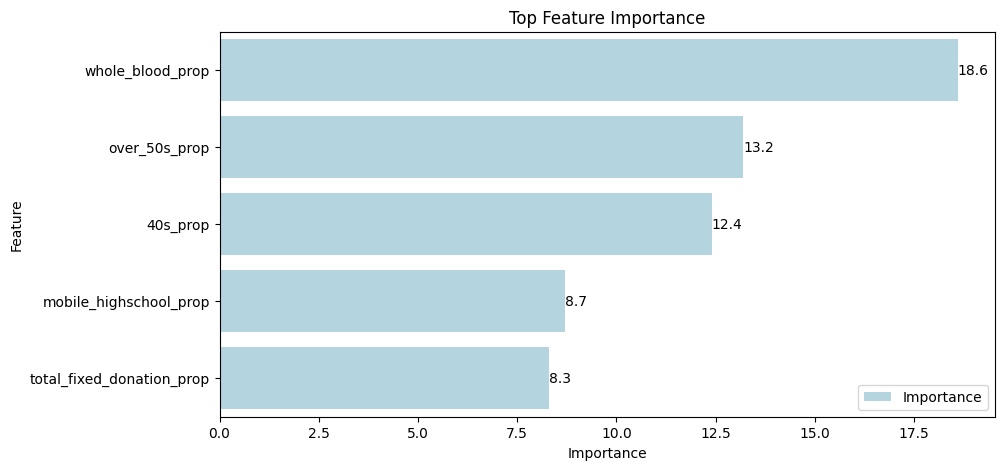

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.barplot(data = importance_df[:5], x = 'importance', y = 'features', label = 'Importance', color = 'lightblue')
ax.bar_label(ax.containers[0])
plt.title('Top Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Conclusion (Recommendations)

<font color = 'blue'>

Through the feature importances extracted from the model, the following features are shown to be more important than others
  * Proportion of whole blood donations
  * Age group: Proportion of over 50s and 40s
  * Location: Proportion of 'High school' and 'Fixed-site'
</font>

<font color = 'blue'>

To achieve high performance, the following Recommendations could be presented.
  * Plan strategies to retain a sufficient number of whole blood donations throughout the year
  * To achieve higher performance(donations), consider various campaigns targeting middle-aged donors.
  * Plan strategies to improve the proportion of donations at the 'fixed site'. Collecting sufficient donations at the fixed site will contribute to stable performance.
  * If the center wants to diversify the mobile donation, interact with local communities to hold blood drives at high school. Delivering the message of blood donation to high school students will help recruit new donors.
</font>